## Notebook para análise do banco de dados do SIH-SUS.

### Para a análise pretendida, a base utilizada foi a do mês de abril de 2024 da UF DF

### De acordo com o histórico de dados qual a previsão do custo de internação de uma pessoa no DF em abril 2024

### Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
sih_sus = pd.read_csv('BancoDF.csv')

<ipython-input-71-7b0471659c0f>:2: DtypeWarning: Columns (87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  sih_sus = pd.read_csv('BancoDF.csv')


In [ ]:
sih_sus.head()

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,SEXO,UTI_MES_IN,UTI_MES_AN,UTI_MES_AL,UTI_MES_TO,MARCA_UTI,UTI_INT_IN,UTI_INT_AN,UTI_INT_AL,UTI_INT_TO,DIAR_ACOM,QT_DIARIAS,PROC_REA,VAL_TOT,VAL_UTI,US_TOT,DT_INTER,DT_SAIDA,DIAG_PRINC,COBRANCA,NATUREZA,NAT_JUR,GESTAO,RUBRICA,IND_VDRL,MUNIC_MOV,COD_IDADE,IDADE,DIAS_PERM,MORTE,NACIONAL,NUM_PROC,CAR_INT,TOT_PT_SP,CPF_AUT,HOMONIMO,NUM_FILHOS,INSTRU,CID_NOTIF,CONTRACEP1,CONTRACEP2,GESTRISCO,INSC_PN,SEQ_AIH5,CBOR,CNAER,VINCPREV,GESTOR_COD,GESTOR_TP,GESTOR_CPF,GESTOR_DT,CNES,CNPJ_MANT,INFEHOSP,CID_ASSO,CID_MORTE,COMPLEX,FINANC,FAEC_TP,REGCT,RACA_COR,ETNIA,SEQUENCIA,REMESSA,AUD_JUST,SIS_JUST,VAL_SH_FED,VAL_SP_FED,VAL_SH_GES,VAL_SP_GES,VAL_UCI,MARCA_UCI,DIAGSEC1,DIAGSEC2,DIAGSEC3,DIAGSEC4,DIAGSEC5,DIAGSEC6,DIAGSEC7,DIAGSEC8,DIAGSEC9,TPDISEC1
0,530000,2024,4,1,394700001260.00,5324100137730,1,72152301,530010,19640714,1,0,0,0,29,75,0,0,0,0,0,2,408050012,18773.07,17400.00,3582.64,20240320,20240419,R02,41,0,1023,2,0,0,530010,4,59,30,1,10,NaN,2,0,NaN,0,0,0,NaN,0,0,1,0,0,0,0,0,14,1,1228522146,NaN,10464,394700000108.00,NaN,0,0,2,6,NaN,0,3,0,505,HE53000001N202404.DTS,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,530000,2024,4,1,394700001260.00,5324100137741,1,73750028,521760,19910612,1,0,0,0,7,75,0,0,0,0,0,16,407030123,5948.23,4200.00,1135.15,20240206,20240229,D731,15,0,1023,2,0,0,530010,4,32,23,0,10,NaN,2,0,NaN,0,0,0,NaN,0,0,1,0,0,0,0,0,14,1,1228522146,NaN,10464,394700000108.00,NaN,0,0,2,6,NaN,0,2,0,506,HE53000001N202404.DTS,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,530000,2024,4,1,394700001260.00,5324100137763,1,73750028,521760,19731107,1,0,0,0,0,0,0,0,0,0,0,2,415010012,3735.12,0.00,712.80,20240208,20240209,K562,27,0,1023,2,0,0,530010,4,50,1,0,10,NaN,2,0,NaN,0,0,0,NaN,0,0,1,0,0,0,0,0,7,1,1228522146,NaN,10464,394700000108.00,NaN,0,0,2,6,NaN,0,3,0,507,HE53000001N202404.DTS,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0,K564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,530000,2024,4,1,394700001260.00,5324100137785,1,73750028,521760,19731107,1,0,0,0,6,75,0,0,0,0,0,2,415010012,6570.71,3600.00,1253.95,20240214,20240221,K564,27,0,1023,2,0,0,530010,4,50,7,0,10,NaN,2,0,NaN,0,0,0,NaN,0,0,1,0,0,0,0,0,15,1,1228522146,NaN,10464,394700000108.00,NaN,0,0,2,6,NaN,0,3,0,509,HE53000001N202404.DTS,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0,K650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,530000,2024,4,1,394700001260.00,5324100137796,1,73750028,521760,19731107,1,0,0,0,2,75,0,0,0,0,0,2,415010012,4807.07,1200.00,917.37,20240221,20240224,K564,27,0,1023,2,0,0,530010,4,50,3,0,10,NaN,2,0,NaN,0,0,0,NaN,0,0,1,0,0,0,0,0,15,1,1228522146,NaN,10464,394700000108.00,NaN,0,0,2,6,NaN,0,3,0,510,HE53000001N202404.DTS,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0,K822,K650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [ ]:
pd.options.display.max_columns = 113
sih_sus.info()
sih_sus.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22390 entries, 0 to 22389
Data columns (total 92 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UF_ZI       22390 non-null  int64  
 1   ANO_CMPT    22390 non-null  int64  
 2   MES_CMPT    22390 non-null  int64  
 3   ESPEC       22390 non-null  int64  
 4   CGC_HOSP    21596 non-null  float64
 5   N_AIH       22390 non-null  int64  
 6   IDENT       22390 non-null  int64  
 7   CEP         22390 non-null  int64  
 8   MUNIC_RES   22390 non-null  int64  
 9   NASC        22390 non-null  int64  
 10  SEXO        22390 non-null  int64  
 11  UTI_MES_IN  22390 non-null  int64  
 12  UTI_MES_AN  22390 non-null  int64  
 13  UTI_MES_AL  22390 non-null  int64  
 14  UTI_MES_TO  22390 non-null  int64  
 15  MARCA_UTI   22390 non-null  int64  
 16  UTI_INT_IN  22390 non-null  int64  
 17  UTI_INT_AN  22390 non-null  int64  
 18  UTI_INT_AL  22390 non-null  int64  
 19  UTI_INT_TO  22390 non-nul

Index(['UF_ZI', 'ANO_CMPT', 'MES_CMPT', 'ESPEC', 'CGC_HOSP', 'N_AIH', 'IDENT',
       'CEP', 'MUNIC_RES', 'NASC', 'SEXO', 'UTI_MES_IN', 'UTI_MES_AN',
       'UTI_MES_AL', 'UTI_MES_TO', 'MARCA_UTI', 'UTI_INT_IN', 'UTI_INT_AN',
       'UTI_INT_AL', 'UTI_INT_TO', 'DIAR_ACOM', 'QT_DIARIAS', 'PROC_REA',
       'VAL_TOT', 'VAL_UTI', 'US_TOT', 'DT_INTER', 'DT_SAIDA', 'DIAG_PRINC',
       'COBRANCA', 'NATUREZA', 'NAT_JUR', 'GESTAO', 'RUBRICA', 'IND_VDRL',
       'MUNIC_MOV', 'COD_IDADE', 'IDADE', 'DIAS_PERM', 'MORTE', 'NACIONAL',
       'NUM_PROC', 'CAR_INT', 'TOT_PT_SP', 'CPF_AUT', 'HOMONIMO', 'NUM_FILHOS',
       'INSTRU', 'CID_NOTIF', 'CONTRACEP1', 'CONTRACEP2', 'GESTRISCO',
       'INSC_PN', 'SEQ_AIH5', 'CBOR', 'CNAER', 'VINCPREV', 'GESTOR_COD',
       'GESTOR_TP', 'GESTOR_CPF', 'GESTOR_DT', 'CNES', 'CNPJ_MANT', 'INFEHOSP',
       'CID_ASSO', 'CID_MORTE', 'COMPLEX', 'FINANC', 'FAEC_TP', 'REGCT',
       'RACA_COR', 'ETNIA', 'SEQUENCIA', 'REMESSA', 'AUD_JUST', 'SIS_JUST',
       'VAL_SH_FED'

In [ ]:
sih_sus_tratada = sih_sus.drop([
    'CGC_HOSP',
    'CNPJ_MANT',
    'AUD_JUST',
    'SIS_JUST',
    'FAEC_TP',
    'GESTOR_DT',
    'INFEHOSP',
    'CID_NOTIF',
    'NUM_PROC',
    'DIAG_PRINC',
    'REMESSA',
    'CEP',
    'MUNIC_RES',
    'NASC',
    'DIAR_ACOM',
    'SEXO',
    #'PROC_SOLIC',
    #'VAL_UTI',
    #'VAL_SH',
    'DT_INTER',
    'DT_SAIDA',
    'COBRANCA',
    'RUBRICA',
    'MUNIC_MOV',
    'NACIONAL',
    'CAR_INT',
    'HOMONIMO',
    'NUM_FILHOS',
    'INSTRU',
    'INSC_PN',
    'SEQ_AIH5',
    'CBOR',
    'CNAER',
    'VINCPREV',
    'GESTOR_COD',
    'GESTOR_TP',
    'GESTOR_CPF',
    'CNES',
    'CID_ASSO',
    'CID_MORTE',
    'REGCT',
    'SEQUENCIA',
    'VAL_SH_FED',
    'VAL_SP_FED',
    'VAL_SH_GES',
    'VAL_SP_GES',
    'VAL_UCI',
    'DIAS_PERM',
    'US_TOT',
    'MES_CMPT',
    'ANO_CMPT',
    'ESPEC',
    'NATUREZA',
    'NAT_JUR',
    'COD_IDADE',
   # 'DIAG_SECUN',
    'RACA_COR',
    'ETNIA',
    'UF_ZI',
    'MORTE',
    'DIAGSEC1',
    'DIAGSEC2',
    'DIAGSEC3',
    'DIAGSEC4',
    'DIAGSEC5',
    'DIAGSEC6',
    'DIAGSEC7',
    'DIAGSEC8',
    'DIAGSEC9',
    'TPDISEC1',
    'CPF_AUT'], axis=1)


In [ ]:
sih_sus_tratada.isnull().sum()

,0
N_AIH,0
IDENT,0
UTI_MES_IN,0
UTI_MES_AN,0
UTI_MES_AL,0
UTI_MES_TO,0
MARCA_UTI,0
UTI_INT_IN,0
UTI_INT_AN,0
UTI_INT_AL,0


In [ ]:
sih_sus_tratada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22390 entries, 0 to 22389
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   N_AIH       22390 non-null  int64  
 1   IDENT       22390 non-null  int64  
 2   UTI_MES_IN  22390 non-null  int64  
 3   UTI_MES_AN  22390 non-null  int64  
 4   UTI_MES_AL  22390 non-null  int64  
 5   UTI_MES_TO  22390 non-null  int64  
 6   MARCA_UTI   22390 non-null  int64  
 7   UTI_INT_IN  22390 non-null  int64  
 8   UTI_INT_AN  22390 non-null  int64  
 9   UTI_INT_AL  22390 non-null  int64  
 10  UTI_INT_TO  22390 non-null  int64  
 11  QT_DIARIAS  22390 non-null  int64  
 12  PROC_REA    22390 non-null  int64  
 13  VAL_TOT     22390 non-null  float64
 14  VAL_UTI     22390 non-null  float64
 15  GESTAO      22390 non-null  int64  
 16  IND_VDRL    22390 non-null  int64  
 17  IDADE       22390 non-null  int64  
 18  TOT_PT_SP   22390 non-null  int64  
 19  CONTRACEP1  22390 non-nul

### Todas as variáveis com valores nulos foram retiradas assim, como as variáveis categóricas.

## Inicio da EDA

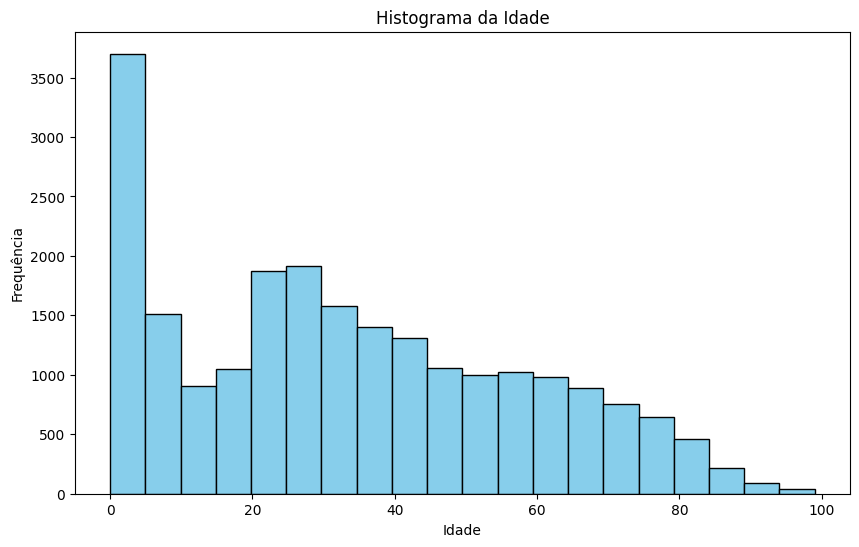

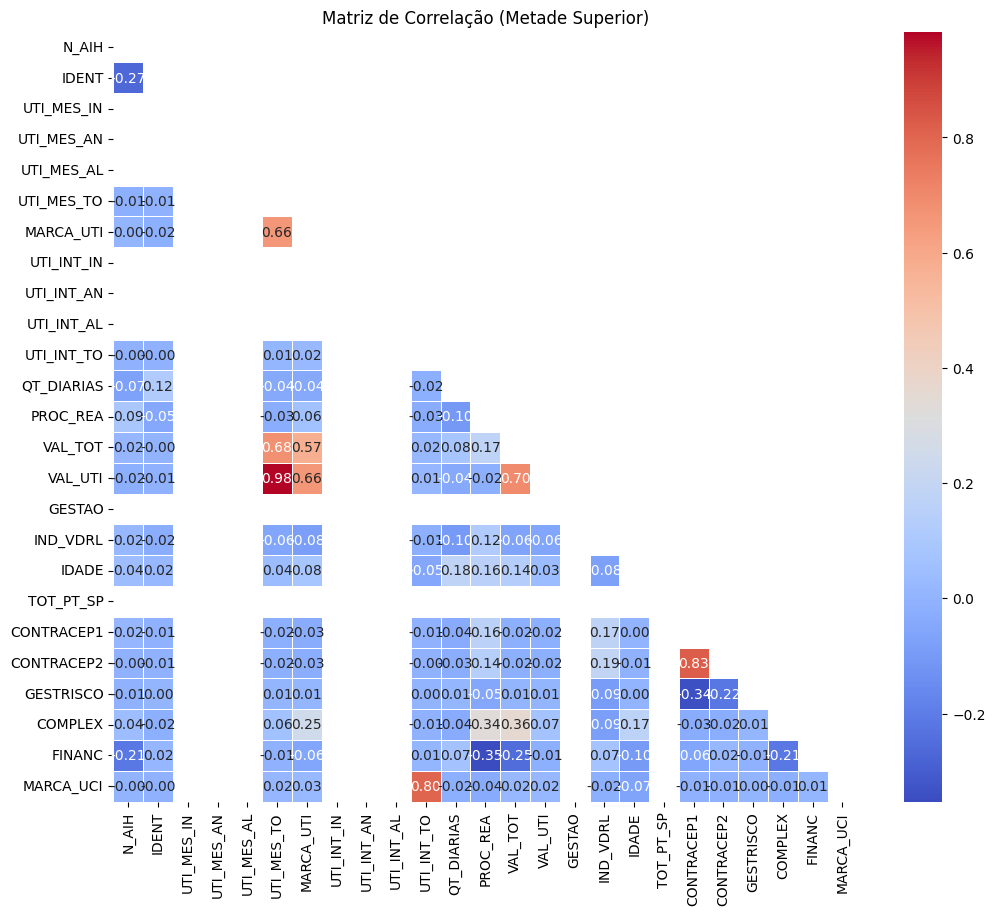

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.hist(sih_sus_tratada['IDADE'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma da Idade')
plt.show()

plt.figure(figsize=(12, 10))

correlation_matrix = sih_sus_tratada.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Matriz de Correlação (Metade Superior)')
plt.show()


### Início da modelagem de dados, testaremos os modelos de Regressão Linear, KNN com 5 e 10 vizinhos e Decision Tree

### Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
X = sih_sus_tratada.drop('VAL_TOT', axis=1)
y = sih_sus_tratada['VAL_TOT']

In [ ]:
regressao_linear = LinearRegression()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
regressao_linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
tabela_coef_rl = pd.DataFrame({'Variável': X.columns, 'Coeficiente': regressao_linear.coef_})

In [ ]:
tabela_coef_rl

,Variável,Coeficiente
0,N_AIH,-0.00
1,IDENT,-36.27
2,UTI_MES_IN,0.00
3,UTI_MES_AN,-0.00
4,UTI_MES_AL,0.00
5,UTI_MES_TO,-137.68
6,MARCA_UTI,22.41
7,UTI_INT_IN,0.00
8,UTI_INT_AN,-0.00
9,UTI_INT_AL,-0.00


In [ ]:
y_pred = regressao_linear.predict(X_test)

In [ ]:
resultado = pd.DataFrame({'Valor Real': y_test, 'Valor Predito': y_pred})

In [ ]:
resultado

,Valor Real,Valor Predito
2467,335.17,678.62
13508,370.34,44.75
2334,287.94,467.72
563,1630.22,1342.71
3519,721.31,631.78
...,...,...
15800,6301.43,2647.10
3965,47.27,-32.50
20879,206.62,587.44
13938,2046.73,938.59


In [ ]:
r2 = r2_score(y_test, y_pred)
print(f'R2 :{r2}')
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

R2 :0.6891838093256011
MSE: 3713297.2966987463
MAE: 668.6687569202603


### O modelo mostrou conseguir explicar 0,68 (r2)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn5 = KNeighborsRegressor(n_neighbors=5)

In [ ]:
knn5.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
knn5_pred = knn5.predict(X_test)

In [ ]:
knn5_resultado = pd.DataFrame({'Valor Real': y_test, 'Valor Predito': knn5_pred})

In [ ]:
knn5_resultado

,Valor Real,Valor Predito
2467,335.17,319.20
13508,370.34,7424.99
2334,287.94,277.33
563,1630.22,1240.25
3519,721.31,259.09
...,...,...
15800,6301.43,3550.40
3965,47.27,72.15
20879,206.62,525.67
13938,2046.73,1078.21


In [ ]:
knn5_r2 = r2_score(y_test, knn5_pred)
print(f'R2 :{knn5_r2}')
knn5_mse = mean_squared_error(y_test, knn5_pred)
print(f'MSE: {knn5_mse}')
knn5_mae = mean_absolute_error(y_test, knn5_pred)
print(f'MAE: {knn5_mae}')

R2 :0.0958916052028872
MSE: 10801313.956774157
MAE: 1236.189217507816


## O resultado para o KNN foi bem pior que o resultado da regressão linear

In [ ]:
knn10 = KNeighborsRegressor(n_neighbors=10)

In [ ]:
knn10.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [ ]:
knn10_pred = knn10.predict(X_test)

In [ ]:
knn10_resultado = pd.DataFrame({'Valor Real': y_test, 'Valor Predito': knn10_pred})

In [ ]:
knn10_r2 = r2_score(y_test, knn10_pred)
print(f'R2 :{knn10_r2}')
knn10_mse = mean_squared_error(y_test, knn10_pred)
print(f'MSE: {knn10_mse}')
knn10_mae = mean_absolute_error(y_test, knn10_pred)
print(f'MAE: {knn10_mae}')

R2 :0.19140711795054166
MSE: 9660197.419347027
MAE: 1185.2744919606967


## O resultado melhorou um pouco com 10 vizinhos, mas continua com uma performance abaixo da regressão linear

### Árvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor(max_depth=10)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [ ]:
dt_pred = dt.predict(X_test)

In [ ]:
dt_resultado = pd.DataFrame({'Valor Real': y_test, 'Valor Predito': dt_pred})

In [ ]:
dt_resultado

,Valor Real,Valor Predito
2467,335.17,591.22
13508,370.34,409.51
2334,287.94,591.22
563,1630.22,2692.52
3519,721.31,673.41
...,...,...
15800,6301.43,2080.42
3965,47.27,65.27
20879,206.62,409.51
13938,2046.73,673.41


In [ ]:
dt_r2 = r2_score(y_test, dt_pred)
print(f'R2 :{dt_r2}')
dt_mse = mean_squared_error(y_test, dt_pred)
print(f'MSE: {dt_mse}')
dt_mae = mean_absolute_error(y_test, dt_pred)
print(f'MAE: {dt_mae}')

R2 :0.649741633615506
MSE: 4184509.9581834273
MAE: 484.75676754020157


## Dentre os três modelos de regressão o que apresentou melhor resultado foi a regressão linear